## CSE251B PA1

In [1]:
#Basic setups 
import numpy as np
from skimage import io
%matplotlib inline
import matplotlib.pyplot as plt

### Part 1: Load and preprocess the data

In [2]:
from dataloader import load_data
from PCA import PCA

In [3]:
#Load and preprocess the data
#We change the load_data function by deleting the value assigned to datatype in the definition
aligned_data,cnt = load_data("./aligned/")

Car types: ['Convertible', 'Minivan', 'Pickup', 'Sedan'] 

Convertible: 149 # of images
Minivan: 148 # of images
Pickup: 150 # of images
Sedan: 150 # of images


### Part 2: Cross Validation Procedure

In [4]:
from random import shuffle
import math
def kFold(K,data):
    """This function is used to implement k-fold cross-validation"""
    #Shuffle the dataset to get more accurate performance
    index = np.arange(0,len(data))
    shuffled_idx = np.random.shuffle(index)
    shuffled_data = data[shuffled_idx]
    
    #Split the data into training, testing and handout set
    size = len(data)
    set_size = math.floor(size/K)
    index_train = int(set_size*(K-2))
    index_test = int(set_size*(K-1))

    
    training_set = shuffled_data[:index_train]
    testing_set = shuffled_data[index_train:index_test]
    val_set = shuffled_data[index_test:]
    return training_set,testing_set,val_set

In [5]:
def img_flatten(img):
    """This function is used to convert 2-D images to 1-D vectors"""
    flatten_img = []
    for i in range(len(img)):
        flatten_img.append(img[i].flatten())
    return np.array(flatten_img)

In [21]:
def plot_top_PCs(eigenvectors,n):
    imgs = []
    plt.figure()
    for i in range(n):
        eigen = eigenvectors[:,i]
        image = np.reshape(eigen,(200,300))
        imgs.append(image)
        plt.subplot(2,n/2,i+1)
        plt.imshow(imgs[i])

In [27]:
#Train Process
#Load data 
minivan = aligned_data.get('Minivan')
convertible = aligned_data.get('Convertible')
pickup = aligned_data.get('Pickup')
sedan = aligned_data.get('Sedan')

minivan_flatten = img_flatten(minivan)
convertible_flatten = img_flatten(convertible)
pickup_flatten = img_flatten(pickup)
sedan_flatten = img_flatten(sedan)

#Perform K-Fold cross validation
num_fold = 10
trainM,testM,valM = kFold(num_fold,minivan_flatten)
trainC,testC,valC = kFold(num_fold,convertible_flatten)
trainP,testP,valP = kFold(num_fold,pickup_flatten)
trainS,testS,valS = kFold(num_fold,sedan_flatten)

#Perform PCA to find top PCs
num_PC = 4
#Minivan
projectedM, mean_imageM, top_sqrt_eigen_valuesM, top_eigen_vectorsM = PCA(trainM[0],num_PC)
#Convertible
projectedC, mean_imageC, top_sqrt_eigen_valuesC, top_eigen_vectorsC = PCA(trainC[0],num_PC)
#Pickup
projectedP, mean_imageP, top_sqrt_eigen_valuesP, top_eigen_vectorsP = PCA(trainP[0],num_PC)
#Sedan
projectedS, mean_imageS, top_sqrt_eigen_valuesS, top_eigen_vectorsS = PCA(trainS[0],num_PC)

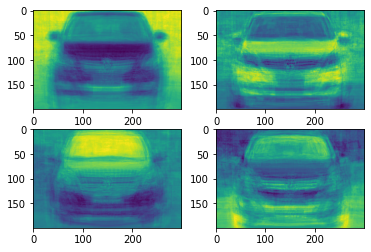

In [31]:
#Plot top PCs
plot_top_PCs(top_eigen_vectorsM,4)